<a href="https://colab.research.google.com/github/kanaka-22/Regualraization-of-L1-L2-/blob/main/Delhiweatherdata_regularizationL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    import keras as K
    from keras.regularizers import l2
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

In [ ]:
dataset = datasets.make_classification(n_samples=100991, n_features=20, n_informative=5, 
                n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, 
                scale=1.0, shuffle=True, random_state=None)

In [ ]:
    X = dataset[0];  y = dataset[1]
    print(X.shape);  print(y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(100991, 20)
(100991,)


In [ ]:
    model = Sequential()
    model.add(Dense(30, input_dim=20, kernel_regularizer=l2(0), # weight regularizer
                    activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(18, kernel_regularizer=l2(0.), # weight regularizer
                    activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer    
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                630       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 18)                558       
_________________________________________________________________
dropout_4 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 19        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
 model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    

In [ ]:
history=model.fit(X_train, y_train, epochs=20, batch_size=20, verbose = 1,validation_split=0.33)

Train on 45334 samples, validate on 22329 samples
Epoch 1/20
45334/45334 [==============================] - 4s 79us/step - loss: 0.4830 - accuracy: 0.7611 - val_loss: 0.2374 - val_accuracy: 0.9163
Epoch 2/20
45334/45334 [==============================] - 3s 77us/step - loss: 0.2926 - accuracy: 0.8888 - val_loss: 0.1748 - val_accuracy: 0.9426
Epoch 3/20
45334/45334 [==============================] - 4s 79us/step - loss: 0.2435 - accuracy: 0.9178 - val_loss: 0.1540 - val_accuracy: 0.9503
Epoch 4/20
45334/45334 [==============================] - 4s 78us/step - loss: 0.2278 - accuracy: 0.9259 - val_loss: 0.1474 - val_accuracy: 0.9528
Epoch 5/20
45334/45334 [==============================] - 4s 79us/step - loss: 0.2125 - accuracy: 0.9320 - val_loss: 0.1420 - val_accuracy: 0.9541
Epoch 6/20
45334/45334 [==============================] - 4s 79us/step - loss: 0.2140 - accuracy: 0.9309 - val_loss: 0.1421 - val_accuracy: 0.9536
Epoch 7/20
45334/45334 [==============================] - 4s 79us/st

In [ ]:
    scores = model.evaluate(X_test, y_test)
    print(); print(model.metrics_names); print(scores)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

33328/33328 [==============================] - 1s 18us/step

['loss', 'accuracy']
[0.12658571091802917, 0.960543692111969]

accuracy: 96.05%


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.12658571091802917 / Test accuracy: 0.960543692111969


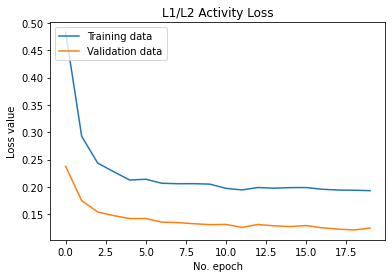

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('L1/L2 Activity Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

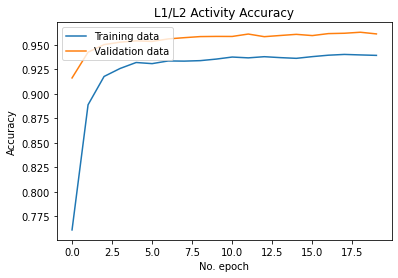

In [ ]:
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('L1/L2 Activity Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()